In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix

In [151]:
data=pd.read_csv("C:\\Users\\HP\\Desktop\\New folder (3)\\train.csv")

Handling Missing Value

In [152]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [153]:
data['Age']=data['Age'].fillna(data['Age'].mean())
data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [154]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Handling Categorical Data

In [155]:
sexmap={"male":1,"female":0}
data['Sex']=data['Sex'].map(sexmap)

In [156]:
emmap={"C":1,"Q":2,"S":3}
data['Embarked']=data['Embarked'].map(emmap)

In [157]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,3


In [158]:
x=data[["Pclass","Sex","Age","Fare","Embarked"]]
y=data["Survived"]

In [159]:
x

,Pclass,Sex,Age,Fare,Embarked
0,3,1,22.000000,7.2500,3
1,1,0,38.000000,71.2833,1
2,3,0,26.000000,7.9250,3
3,1,0,35.000000,53.1000,3
4,3,1,35.000000,8.0500,3
...,...,...,...,...,...
886,2,1,27.000000,13.0000,3
887,1,0,19.000000,30.0000,3
888,3,0,29.699118,23.4500,3
889,1,1,26.000000,30.0000,1


KNN Classifier

In [160]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [161]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
acc=[]
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    yhat=knn.predict(X_test)
    acc.append(accuracy_score(y_test,yhat))
    print("For k = ",i," : ",accuracy_score(y_test,yhat))

For k =  1  :  0.6424581005586593
For k =  2  :  0.6703910614525139
For k =  3  :  0.7206703910614525
For k =  4  :  0.6536312849162011
For k =  5  :  0.7039106145251397
For k =  6  :  0.6927374301675978
For k =  7  :  0.6983240223463687
For k =  8  :  0.6871508379888268
For k =  9  :  0.6927374301675978


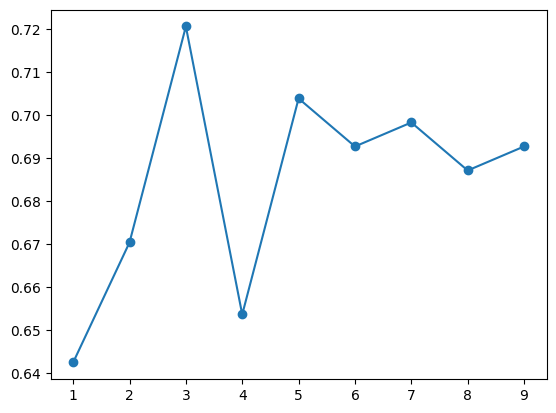

In [162]:
plt.Figure(figsize=(8,6))
plt.plot(range(1,10),acc, marker="o")
plt.show()

The accuracy of k Nearest model is : 82.68


Text(0.5, 1.05, 'Confusion_matrix')

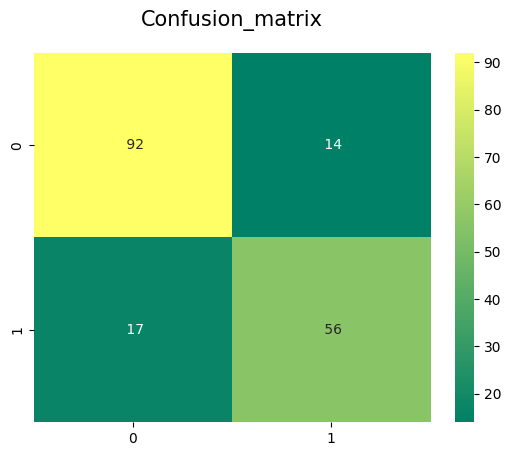

In [163]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x,y)
y_pred=model.predict(X_test)
print("The accuracy of k Nearest model is :",round(accuracy_score(y_pred,y_test)*100,2))
result_knn=round(accuracy_score(y_pred,y_test)*100,2)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)


Logestic Regression

--------------The Accuracy of the model----------------------------
The accuracy of the Logistic Regression is 78.21


Text(0.5, 1.05, 'Confusion_matrix')

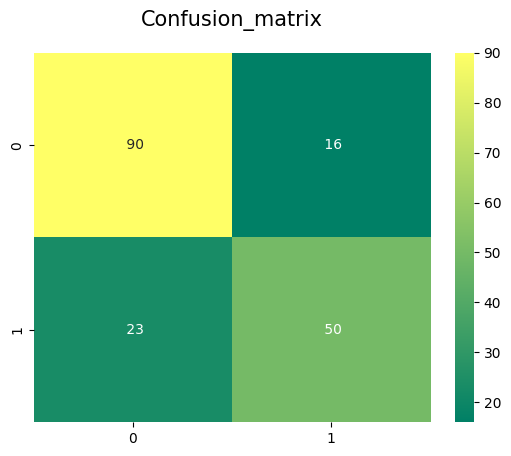

In [164]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
predictionLR=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Logistic Regression is',round(accuracy_score(predictionLR,y_test)*100,2))
result_LR=round(accuracy_score(predictionLR,y_test)*100,2)
sns.heatmap(confusion_matrix(y_test,predictionLR),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)


Random Forest Classifier

--------------The Accuracy of the model----------------------------
The accuracy of the Logistic Regression is 79.89


Text(0.5, 1.05, 'Confusion_matrix')

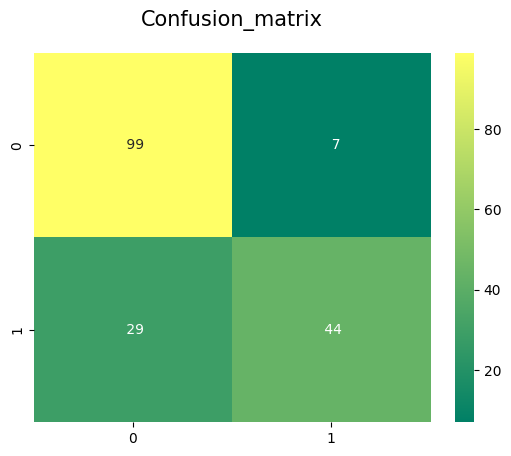

In [165]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=700, min_samples_split=10,min_samples_leaf=1,oob_score=True,random_state=1,n_jobs=-1)
model.fit(X_train,y_train)
predictionRF=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Logistic Regression is',round(accuracy_score(predictionRF,y_test)*100,2))
result_RF=round(accuracy_score(predictionRF,y_test)*100,2)
sns.heatmap(confusion_matrix(y_test,predictionRF),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)


Support Vector Machine

--------------The Accuracy of the model----------------------------
The accuracy of the Logistic Regression is 63.69


Text(0.5, 1.05, 'Confusion_matrix')

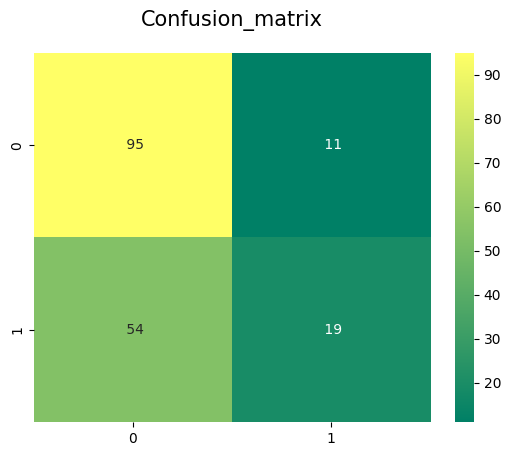

In [166]:
from sklearn.svm import SVC, LinearSVC
model=SVC()
model.fit(X_train,y_train)
predictionSVM=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Logistic Regression is',round(accuracy_score(predictionSVM,y_test)*100,2))
result_SVM=round(accuracy_score(predictionSVM,y_test)*100,2)
sns.heatmap(confusion_matrix(y_test,predictionSVM),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

Linear Discriminant Analysis

--------------The Accuracy of the model----------------------------
The accuracy of the Logistic Regression is 77.65


Text(0.5, 1.05, 'Confusion_matrix')

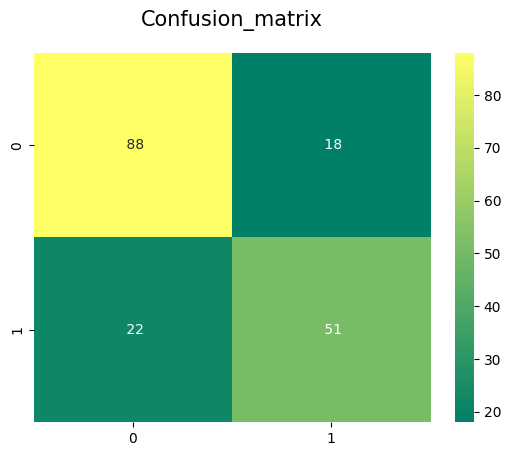

In [167]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model=LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
predictionLDA=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Logistic Regression is',round(accuracy_score(predictionLDA,y_test)*100,2))
result_LDA=round(accuracy_score(predictionLDA,y_test)*100,2)
sns.heatmap(confusion_matrix(y_test,predictionLDA),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [168]:
models = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 
              'Random Forest', 'Support Vector Machines', 'Linear Discriminant Analysis', 
             ],
    'Score': [result_knn, result_LR, result_RF, 
              result_SVM, result_LDA]})
models.sort_values(by='Score',ascending=False)

,Model,Score
0,KNN,82.68
2,Random Forest,79.89
1,Logistic Regression,78.21
4,Linear Discriminant Analysis,77.65
3,Support Vector Machines,63.69
